In [20]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import rc
import PIL
import seaborn as sns 
from wordcloud import WordCloud 
from konlpy.tag import Okt
import numpy as np
import locale
from matplotlib import font_manager, rc

In [2]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv("fixed_card.csv")
df.head(5)

,id,person_id,age_group,person_gender,pay_date,pay_day_of_week,pay_hour_group,amount,pay_place_name,large_category,mid_category,agedivided
0,ebdaf06204854c075f03cbe87e6efe0b,c9bcf2dbfaee5e671e9ab2ee1a0d2b69,44,1,2022-07-01,금요일,0,19000,통신,주거/통신,통신,40~49
1,c4bede853d2ddeb80b6ca7e2ccb862f8,c9bcf2dbfaee5e671e9ab2ee1a0d2b69,44,1,2022-07-01,금요일,0,19000,통신,주거/통신,통신,40~49
2,ca2f25b7cc6ea4f9e1c08844533f55f7,e04bbaba898c70a489ddd9e4308b8e01,32,0,2022-07-01,금요일,0,141000,G마켓,온라인쇼핑,인터넷쇼핑,30~39
3,37b9e5a009ac0247ee0bcde90ef296a6,02aefae9b85ff70e73693cf98f542c49,32,1,2022-07-01,금요일,0,7000,주유소,교통/차량,주유소,30~39
4,f7f0acde53c66889e8036823d0bd49d2,530d3a072452dccd0d81ead8f46d45ec,28,1,2022-07-01,금요일,0,40000,술/유흥,술/유흥,기타,20~29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544610 entries, 0 to 23544609
Data columns (total 12 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   person_id        object
 2   age_group        int64 
 3   person_gender    int64 
 4   pay_date         object
 5   pay_day_of_week  object
 6   pay_hour_group   int64 
 7   amount           int64 
 8   pay_place_name   object
 9   large_category   object
 10  mid_category     object
 11  agedivided       object
dtypes: int64(4), object(8)
memory usage: 2.1+ GB


In [6]:
df['pay_date'] = pd.to_datetime(df['pay_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544610 entries, 0 to 23544609
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               object        
 1   person_id        object        
 2   age_group        int64         
 3   person_gender    int64         
 4   pay_date         datetime64[ns]
 5   pay_day_of_week  object        
 6   pay_hour_group   int64         
 7   amount           int64         
 8   pay_place_name   object        
 9   large_category   object        
 10  mid_category     object        
 11  agedivided       object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 2.1+ GB


In [7]:
df['person_gender'] = df['person_gender'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544610 entries, 0 to 23544609
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               object        
 1   person_id        object        
 2   age_group        int64         
 3   person_gender    object        
 4   pay_date         datetime64[ns]
 5   pay_day_of_week  object        
 6   pay_hour_group   int64         
 7   amount           int64         
 8   pay_place_name   object        
 9   large_category   object        
 10  mid_category     object        
 11  agedivided       object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 2.1+ GB


In [8]:
df['person_gender'] = df['person_gender'].replace({"0": "female", "1":"male"})
df.head(4)

,id,person_id,age_group,person_gender,pay_date,pay_day_of_week,pay_hour_group,amount,pay_place_name,large_category,mid_category,agedivided
0,ebdaf06204854c075f03cbe87e6efe0b,c9bcf2dbfaee5e671e9ab2ee1a0d2b69,44,male,2022-07-01,금요일,0,19000,통신,주거/통신,통신,40~49
1,c4bede853d2ddeb80b6ca7e2ccb862f8,c9bcf2dbfaee5e671e9ab2ee1a0d2b69,44,male,2022-07-01,금요일,0,19000,통신,주거/통신,통신,40~49
2,ca2f25b7cc6ea4f9e1c08844533f55f7,e04bbaba898c70a489ddd9e4308b8e01,32,female,2022-07-01,금요일,0,141000,G마켓,온라인쇼핑,인터넷쇼핑,30~39
3,37b9e5a009ac0247ee0bcde90ef296a6,02aefae9b85ff70e73693cf98f542c49,32,male,2022-07-01,금요일,0,7000,주유소,교통/차량,주유소,30~39


In [9]:
df['Year'] = df['pay_date'].dt.year 
df.head(5)

,id,person_id,age_group,person_gender,pay_date,pay_day_of_week,pay_hour_group,amount,pay_place_name,large_category,mid_category,agedivided,Year
0,ebdaf06204854c075f03cbe87e6efe0b,c9bcf2dbfaee5e671e9ab2ee1a0d2b69,44,male,2022-07-01,금요일,0,19000,통신,주거/통신,통신,40~49,2022
1,c4bede853d2ddeb80b6ca7e2ccb862f8,c9bcf2dbfaee5e671e9ab2ee1a0d2b69,44,male,2022-07-01,금요일,0,19000,통신,주거/통신,통신,40~49,2022
2,ca2f25b7cc6ea4f9e1c08844533f55f7,e04bbaba898c70a489ddd9e4308b8e01,32,female,2022-07-01,금요일,0,141000,G마켓,온라인쇼핑,인터넷쇼핑,30~39,2022
3,37b9e5a009ac0247ee0bcde90ef296a6,02aefae9b85ff70e73693cf98f542c49,32,male,2022-07-01,금요일,0,7000,주유소,교통/차량,주유소,30~39,2022
4,f7f0acde53c66889e8036823d0bd49d2,530d3a072452dccd0d81ead8f46d45ec,28,male,2022-07-01,금요일,0,40000,술/유흥,술/유흥,기타,20~29,2022


# Separate gender

In [9]:
data1= df[df['Year'] == 2022]
data2 = df[df['Year'] == 2023] 

## 2022

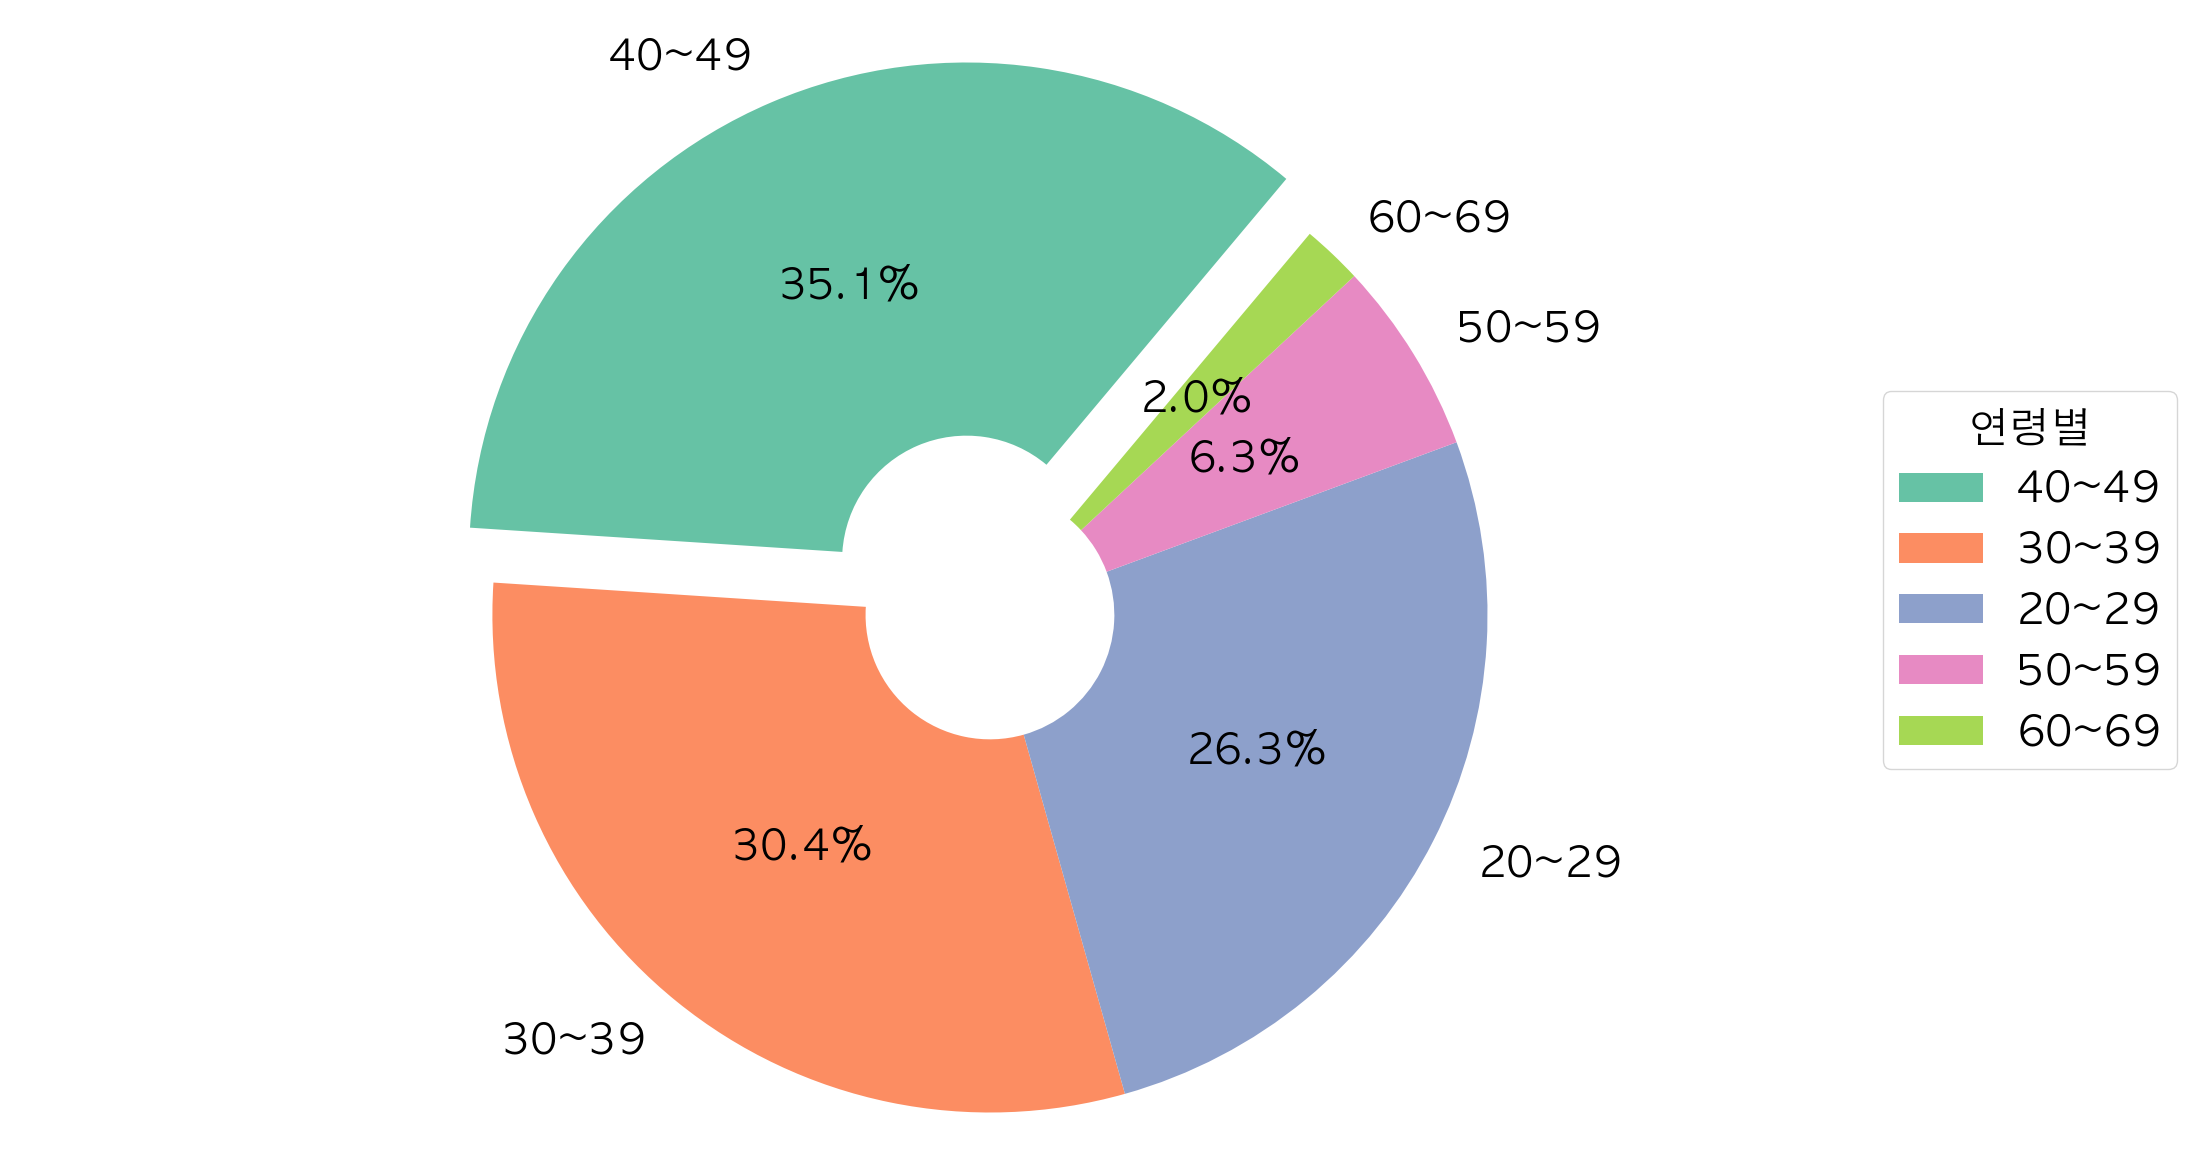

In [11]:
twenty_counts = data1['agedivided'].value_counts()

# Create a pie chart

font_props = {'fontweight': 'bold', 'fontsize': 25}
wedgeprops = {'width' : 0.75}

plt.figure(figsize = (25,15))
plt.pie(twenty_counts, labels=twenty_counts.index, autopct='%1.1f%%', startangle=50,wedgeprops = wedgeprops,
        textprops={'fontweight': 'bold','fontsize':30}, colors=sns.color_palette('Set2'), explode=[0.12, 0, 0, 0, 0])
legend = plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize= 30,bbox_transform=plt.gcf().transFigure, title = "연령별")
plt.setp(legend.get_title(), fontsize=30) 


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 2023

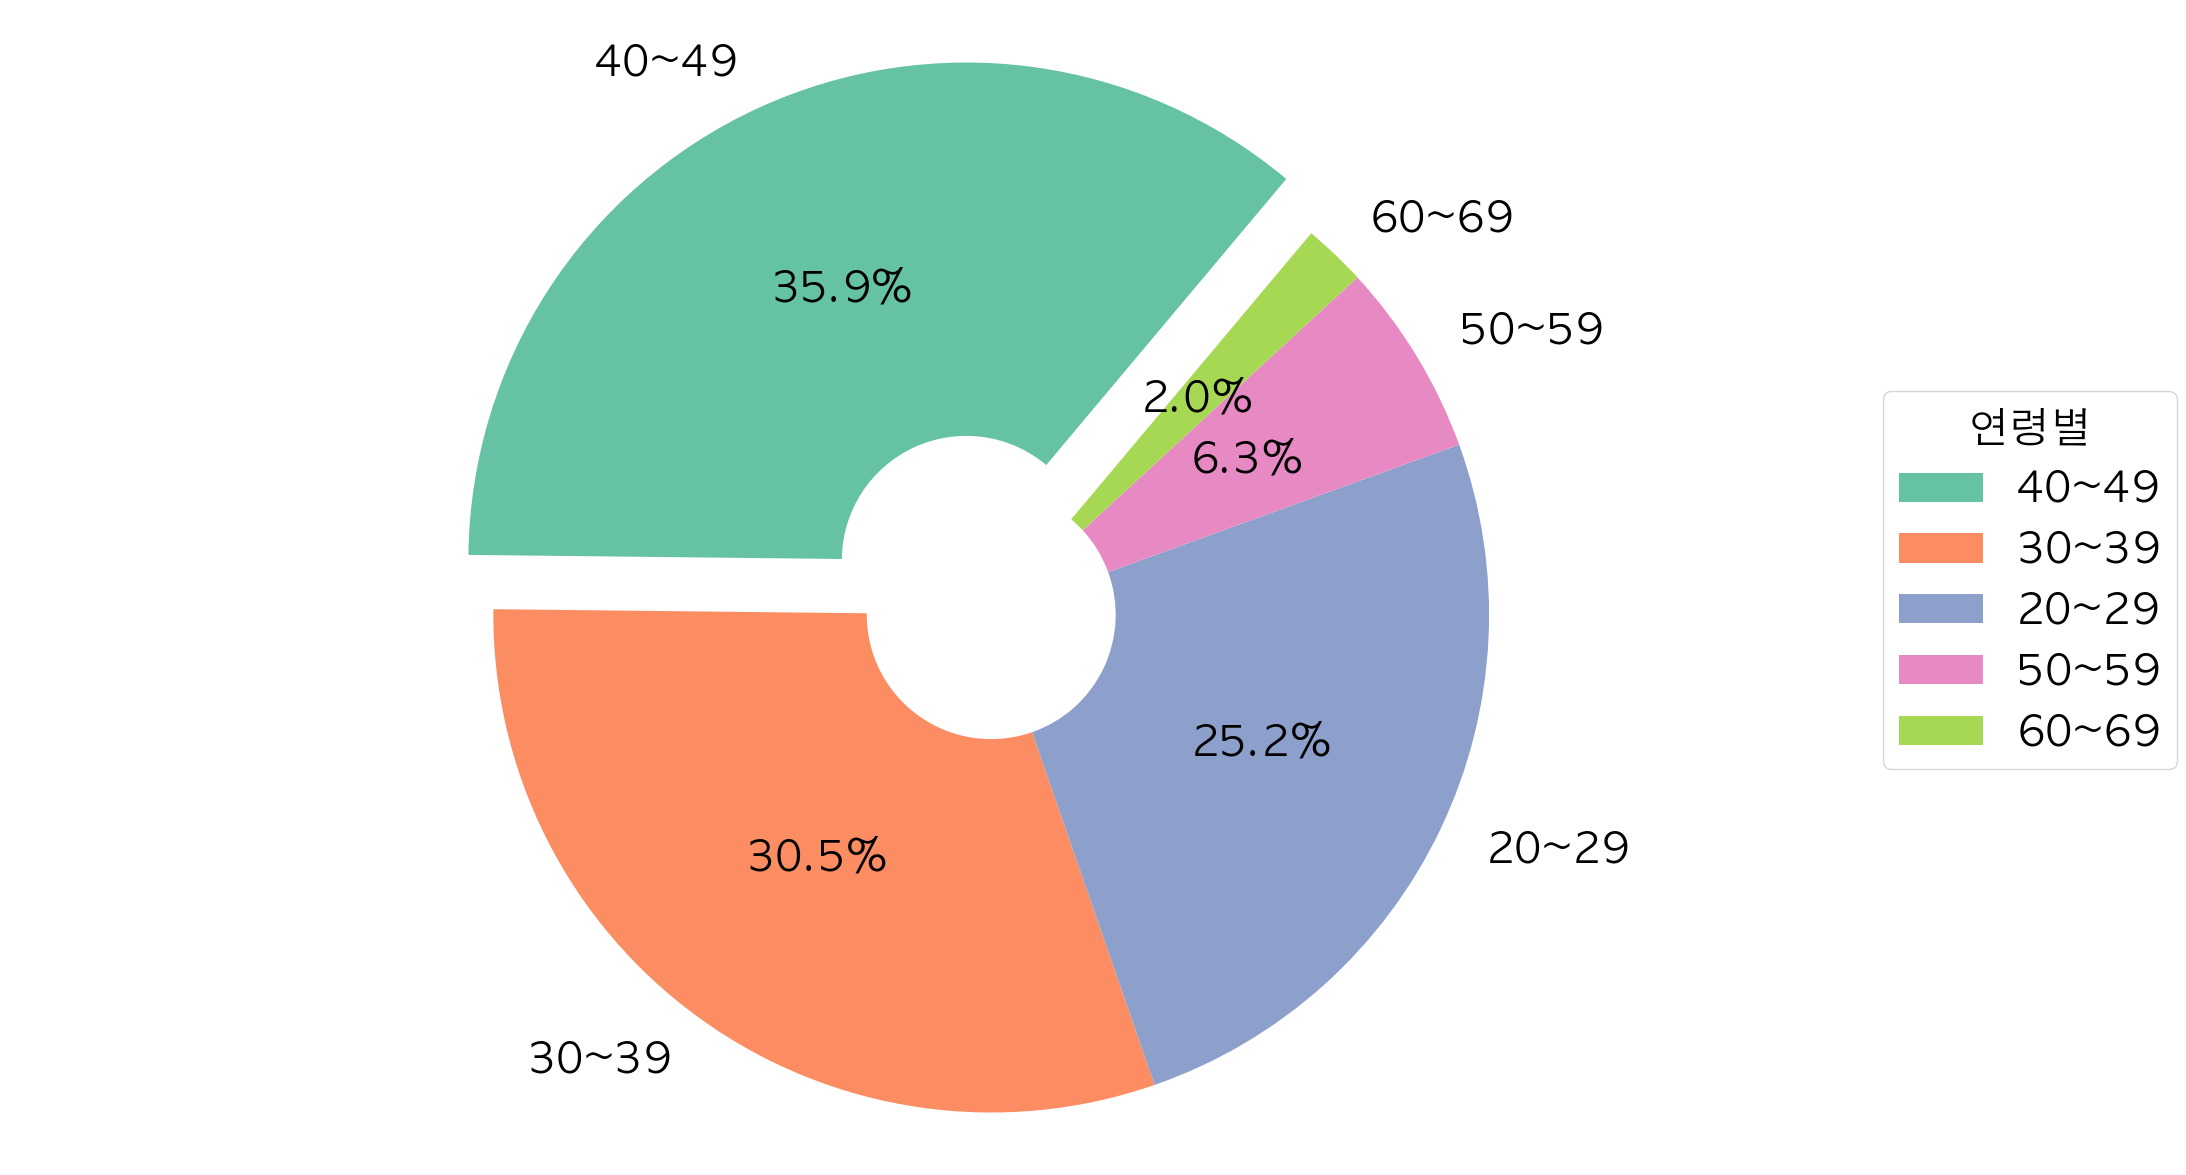

In [12]:
three_counts = data2['agedivided'].value_counts()

# Create a pie chart

font_props = {'fontweight': 'bold', 'fontsize': 25}
wedgeprops = {'width' : 0.75}

plt.figure(figsize = (25,15))
plt.pie(three_counts, labels=three_counts.index, autopct='%1.1f%%', startangle=50,wedgeprops = wedgeprops,
        textprops={'fontweight': 'bold','fontsize':30}, colors=sns.color_palette('Set2'), explode=[0.12, 0, 0, 0, 0])
legend = plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize= 30,bbox_transform=plt.gcf().transFigure, title = "연령별")
plt.setp(legend.get_title(), fontsize=30) 


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

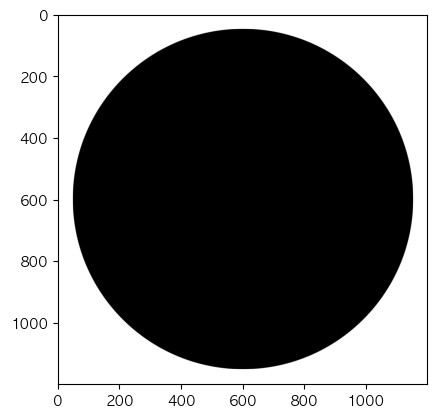

In [10]:
icon1 = PIL.Image.open('circle.png')
plt.imshow(icon1)

In [11]:
img = PIL.Image.new('RGB', icon1.size,(255,255,255))
img.paste(icon1,icon1)
img = np.array(img)

img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# WordCloud 

In [12]:
df.head(3)

,id,person_id,age_group,person_gender,pay_date,pay_day_of_week,pay_hour_group,amount,pay_place_name,large_category,mid_category,agedivided,Year
0,ebdaf06204854c075f03cbe87e6efe0b,c9bcf2dbfaee5e671e9ab2ee1a0d2b69,44,male,2022-07-01,금요일,0,19000,통신,주거/통신,통신,40~49,2022
1,c4bede853d2ddeb80b6ca7e2ccb862f8,c9bcf2dbfaee5e671e9ab2ee1a0d2b69,44,male,2022-07-01,금요일,0,19000,통신,주거/통신,통신,40~49,2022
2,ca2f25b7cc6ea4f9e1c08844533f55f7,e04bbaba898c70a489ddd9e4308b8e01,32,female,2022-07-01,금요일,0,141000,G마켓,온라인쇼핑,인터넷쇼핑,30~39,2022


In [13]:
data20 = df[df['agedivided'] == "20~29"]
data30 = df[df['agedivided'] == "30~39"]
data40 = df[df['agedivided'] == "40~49"]
data50 = df[df['agedivided'] == "50~59"]
data60 = df[df['agedivided'] == "60~69"]

# 20대 

In [14]:
two_counts = data20['mid_category'].value_counts()

In [15]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloud1 = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(two_counts)

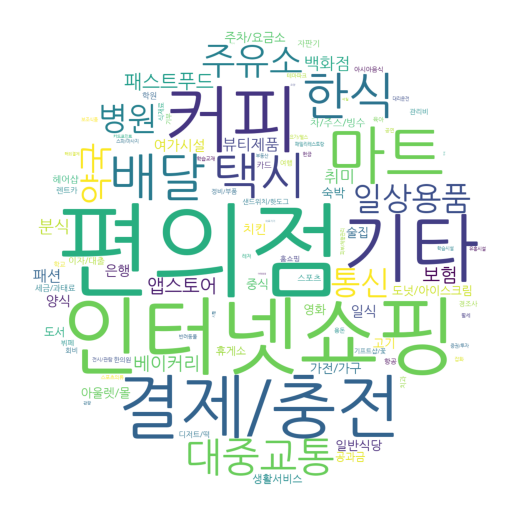

In [16]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 30대

In [17]:
three_counts = data30['mid_category'].value_counts()

In [18]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloud2 = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(three_counts)

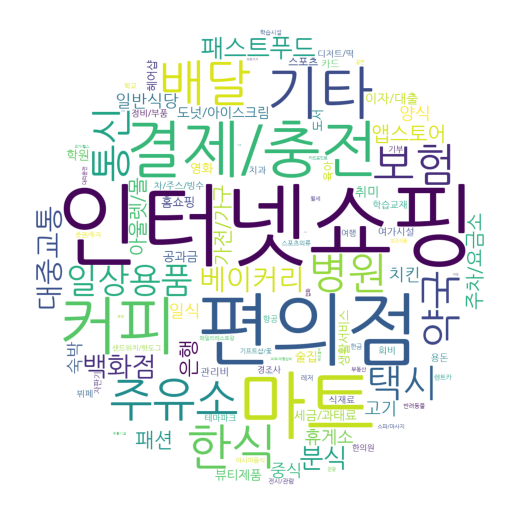

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 40대

In [21]:
four_counts = data40['mid_category'].value_counts()

In [22]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloud3 = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(four_counts)

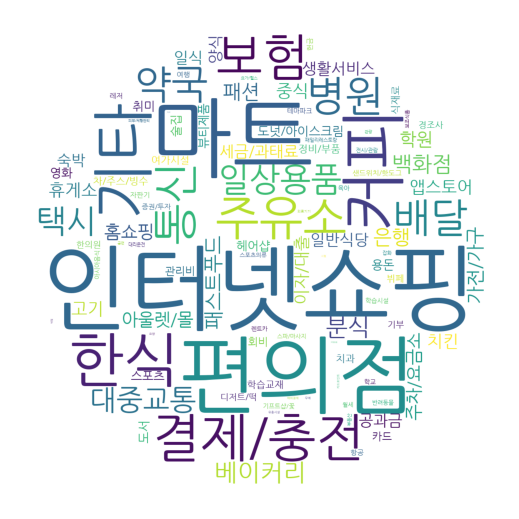

In [23]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 50대

In [24]:
five_counts = data50['mid_category'].value_counts()

In [25]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloud4 = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(five_counts)

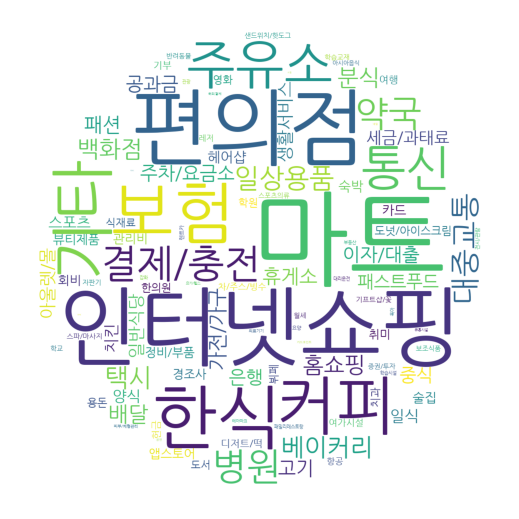

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud4)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 60대

In [27]:
six_counts = data60['mid_category'].value_counts()

In [28]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloud6 = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(six_counts)

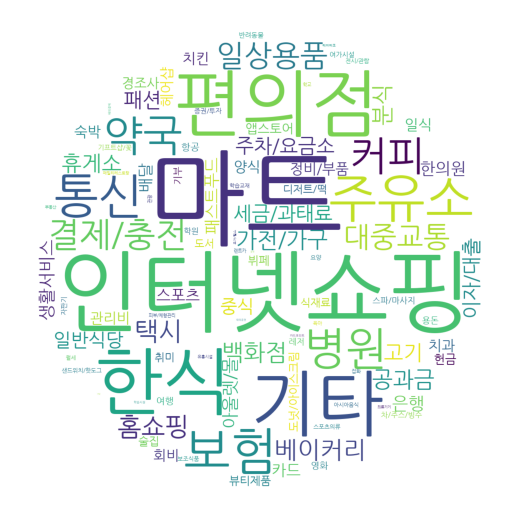

In [29]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud6)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()